In [1]:
import pandas as pd

In [2]:
#set PANDAS to show all columns in Data frame
pd.set_option('display.max_columns', None)

In [3]:
covid_data = pd.read_csv('./owid-covid-data.csv')


In [ ]:
covid_data.head()

In [ ]:
covid_data.info()

In [ ]:
print (len(covid_data)) #number of observations (rows)
print (len(covid_data.columns)) # number of variables (columns)
print(covid_data['iso_code'].value_counts(sort=False))


In [7]:
covid_data['date'] = pd.to_datetime(covid_data['date'])
covid_data["year"] = covid_data['date'].apply(lambda x:x.year)
covid_data["month"] = covid_data['date'].apply(lambda x:x.month)
covid_data["day"] = covid_data['date'].apply(lambda x:x.day)


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot

In [4]:
# ---------------------------
# 数据读取与预览
# ---------------------------
df = pd.read_csv('owid-covid-data.csv')


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
import matplotlib as mp

import matplotlib.pyplot as plt
from matplotlib import font_manager

font_dirs = ["./fonts"]  # The path to the custom font file.
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)
    
    print(font_file)
    
    # print the font name
    print(font_manager.FontProperties(fname=font_file).get_name())
    
    # print the font family
    print(font_manager.FontProperties(fname=font_file).get_family())
    
    


c:\Users\Dylan\OneDrive - South East Technological University (Waterford Campus)\DSP\fonts\NotoSans-VariableFont_wdth,wght.ttf
Noto Sans
['sans-serif']
c:\Users\Dylan\OneDrive - South East Technological University (Waterford Campus)\DSP\fonts\NotoSansSC-Black.ttf
Noto Sans SC
['sans-serif']
c:\Users\Dylan\OneDrive - South East Technological University (Waterford Campus)\DSP\fonts\NotoSansSC-SemiBold.ttf
Noto Sans SC
['sans-serif']
c:\Users\Dylan\OneDrive - South East Technological University (Waterford Campus)\DSP\fonts\NotoSansSC-Thin.ttf
Noto Sans SC
['sans-serif']
c:\Users\Dylan\OneDrive - South East Technological University (Waterford Campus)\DSP\fonts\NotoSansSC-Bold.ttf
Noto Sans SC
['sans-serif']
c:\Users\Dylan\OneDrive - South East Technological University (Waterford Campus)\DSP\fonts\NotoSans-Italic-VariableFont_wdth,wght.ttf
Noto Sans
['sans-serif']
c:\Users\Dylan\OneDrive - South East Technological University (Waterford Campus)\DSP\fonts\NotoSansSC-ExtraBold.ttf
Noto Sans SC

In [11]:
# 设置 Seaborn 绘图风格
sns.set_theme(style="whitegrid", font='Noto Sans SC')

# 查看数据基本信息
print("数据预览：")
print(df.head())
print("\n数据基本信息：")
print(df.info())

# ---------------------------
# 缺失值分析
# ---------------------------
missing_values = df.isnull().sum()
print("\n各列缺失值数量：")
print(missing_values[missing_values > 0])

# ---------------------------
# 数据筛选与管理
# ---------------------------
# 关注政府应对措施与效果分析，选择需要的列：日期、国家、政策严格指数与新增病例（平滑）
cols = ['date', 'location', 'stringency_index', 'new_cases_smoothed']
df_gov = df[cols].copy()

# 将 date 列转换为 datetime 类型，并按日期排序
df_gov['date'] = pd.to_datetime(df_gov['date'])
df_gov = df_gov.sort_values('date')

# 选择一个具体国家进行分析（例如：United States）
country = 'United States'
df_country = df_gov[df_gov['location'] == country].copy()

# 检查该国数据的缺失情况
print(f"\n{country} 数据缺失值情况：")
print(df_country.isnull().sum())


数据预览：
  iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-01-05          0.0        0.0   
1      AFG      Asia  Afghanistan  2020-01-06          0.0        0.0   
2      AFG      Asia  Afghanistan  2020-01-07          0.0        0.0   
3      AFG      Asia  Afghanistan  2020-01-08          0.0        0.0   
4      AFG      Asia  Afghanistan  2020-01-09          0.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           0.0         0.0                  NaN  ...   
1                 NaN           0.0         0.0                  NaN  ...   
2                 NaN           0.0         0.0                  NaN  ...   
3                 NaN           0.0         0.0                  NaN  ...   
4                 NaN           0.0         0.0                  NaN  ...   

   male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
0           NaN      


清洗后 United States 的数据记录数： 1087

加入滞后变量后数据记录数： 1080


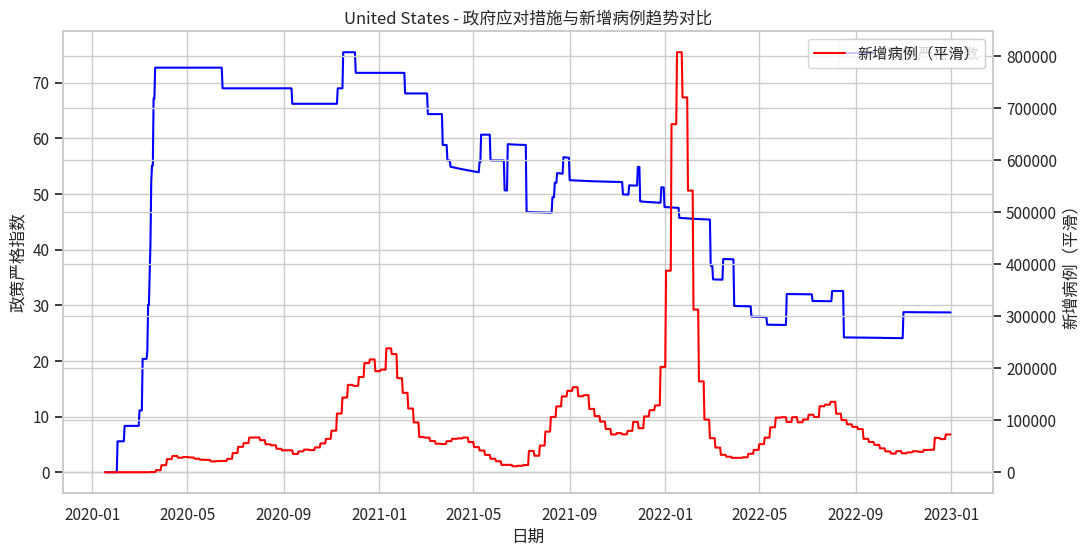


滞后7天的政策严格指数与新增病例（平滑）相关性矩阵：
                       stringency_index_lag7  new_cases_smoothed
stringency_index_lag7               1.000000            0.098382
new_cases_smoothed                  0.098382            1.000000


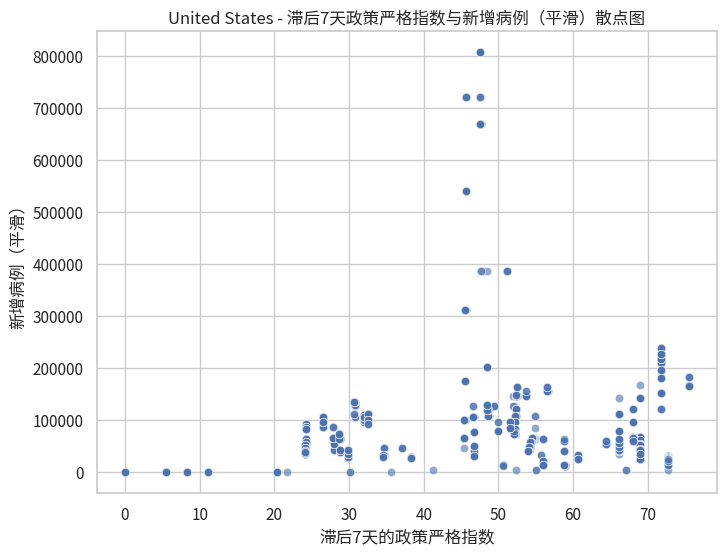


回归分析结果：
                            OLS Regression Results                            
Dep. Variable:     new_cases_smoothed   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     10.54
Date:                Thu, 13 Mar 2025   Prob (F-statistic):            0.00121
Time:                        14:05:54   Log-Likelihood:                -14117.
No. Observations:                1080   AIC:                         2.824e+04
Df Residuals:                    1078   BIC:                         2.825e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                

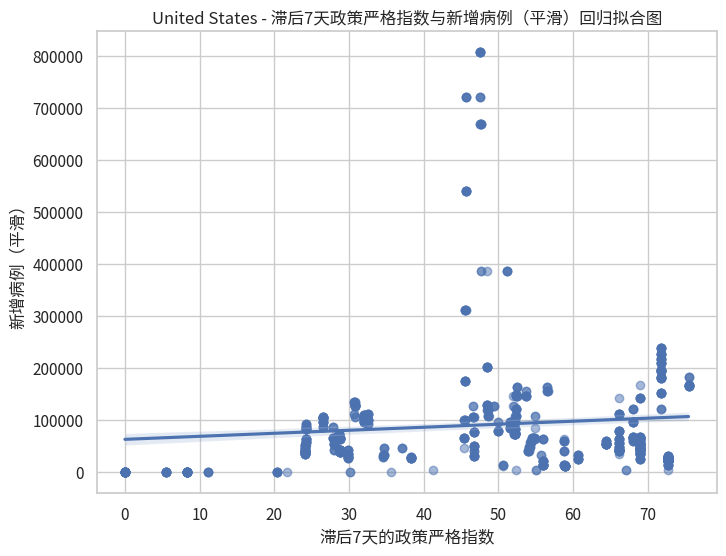

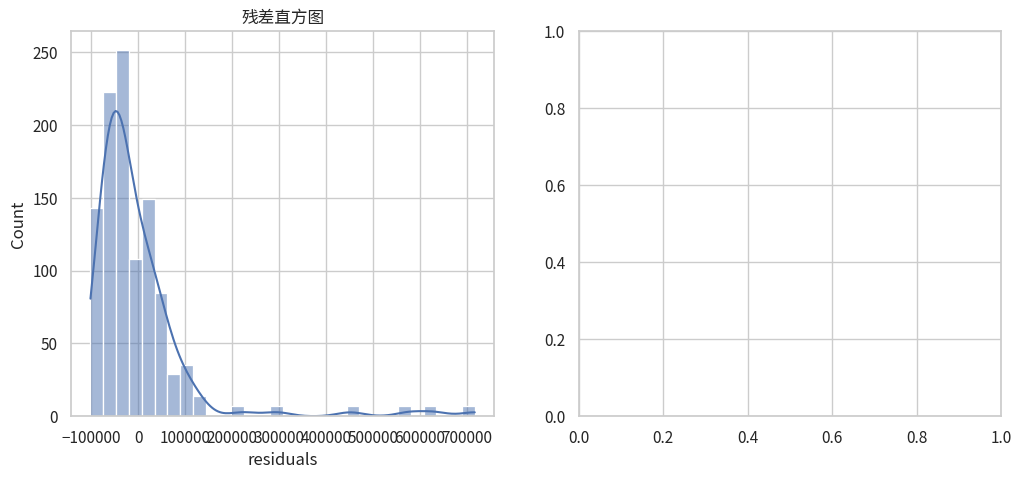

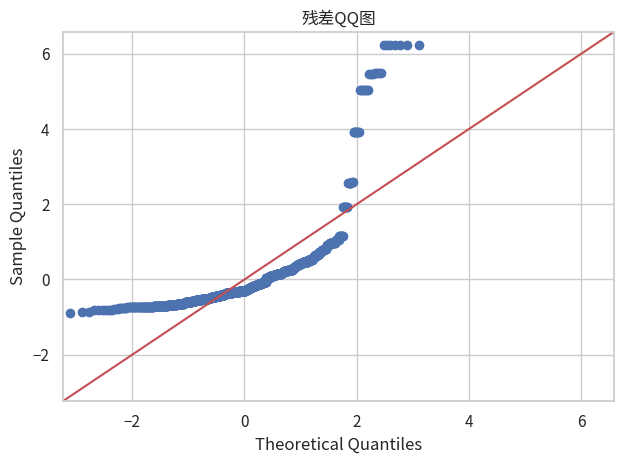

In [12]:
# ---------------------------
# 数据清洗
# ---------------------------
# 删除缺失 stringency_index 或 new_cases_smoothed 的行
df_country_clean = df_country.dropna(subset=['stringency_index', 'new_cases_smoothed'])
print(f"\n清洗后 {country} 的数据记录数： {df_country_clean.shape[0]}")

# 为考虑政策生效的延迟效应，构造滞后变量（例如：滞后 7 天的政策严格指数）
df_country_clean = df_country_clean.sort_values('date')
df_country_clean['stringency_index_lag7'] = df_country_clean['stringency_index'].shift(7)
# 删除因构造滞后变量而产生的缺失值
df_country_clean = df_country_clean.dropna(subset=['stringency_index_lag7'])
print(f"\n加入滞后变量后数据记录数： {df_country_clean.shape[0]}")

# ---------------------------
# 可视化：时间趋势分析
# ---------------------------
plt.figure(figsize=(12, 6))
ax1 = plt.gca()
sns.lineplot(data=df_country_clean, x='date', y='stringency_index', label='政策严格指数', color='blue', ax=ax1)
ax2 = ax1.twinx()
sns.lineplot(data=df_country_clean, x='date', y='new_cases_smoothed', label='新增病例（平滑）', color='red', ax=ax2)
ax1.set_xlabel('日期')
ax1.set_ylabel('政策严格指数')
ax2.set_ylabel('新增病例（平滑）')
plt.title(f'{country} - 政府应对措施与新增病例趋势对比')
plt.show()

# ---------------------------
# 相关性分析
# ---------------------------
# 计算滞后7天的政策严格指数与新增病例（平滑）之间的相关性
corr_matrix = df_country_clean[['stringency_index_lag7', 'new_cases_smoothed']].corr()
print("\n滞后7天的政策严格指数与新增病例（平滑）相关性矩阵：")
print(corr_matrix)

# 绘制散点图展示两者的关系
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_country_clean, x='stringency_index_lag7', y='new_cases_smoothed', alpha=0.6)
plt.title(f'{country} - 滞后7天政策严格指数与新增病例（平滑）散点图')
plt.xlabel('滞后7天的政策严格指数')
plt.ylabel('新增病例（平滑）')
plt.show()

# ---------------------------
# 回归分析
# ---------------------------
# 使用滞后7天的政策严格指数作为自变量，新增病例（平滑）作为因变量
X = df_country_clean['stringency_index_lag7']
y = df_country_clean['new_cases_smoothed']

# 添加常数项（截距）
X = sm.add_constant(X)

# 构建并拟合 OLS 线性回归模型
model = sm.OLS(y, X).fit()

# 输出回归结果摘要
print("\n回归分析结果：")
print(model.summary())

# ---------------------------
# 回归拟合结果可视化
# ---------------------------
plt.figure(figsize=(8, 6))
sns.regplot(x='stringency_index_lag7', y='new_cases_smoothed', data=df_country_clean, scatter_kws={'alpha':0.5})
plt.title(f'{country} - 滞后7天政策严格指数与新增病例（平滑）回归拟合图')
plt.xlabel('滞后7天的政策严格指数')
plt.ylabel('新增病例（平滑）')
plt.show()

# ---------------------------
# 残差分析
# ---------------------------
# 将模型残差添加到数据中
df_country_clean['residuals'] = model.resid

# 绘制残差直方图和QQ图检查正态性
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df_country_clean['residuals'], kde=True, bins=30)
plt.title('残差直方图')

plt.subplot(1, 2, 2)
qqplot(df_country_clean['residuals'], line='45', fit=True, markerfacecolor='b', markeredgecolor='b')
plt.title('残差QQ图')
plt.tight_layout()
plt.show()